# Coursera Data Science Course Capstone Notebook

This notebook serves the dual purpose af containing both the code for and the report on the tasks of my Coursera IBM Data Science course capstone project: Exploring the feasibility of setting up a small chain of foodstores in Toronto that sell unboxed products. 

## Table of Contents

1.  [Introduction - A Chain of Unboxed Food Stores in Toronto](#introduction)

2.  [Data Used for Solving the Problem](#data)

3.  [Methodology](#methodology)
    
    3.1 [Collecting and Preprocessing Toronto Neighborhood Data](#methodology1)
    
    3.2 [Adding Information on Good Neighbors and Competitors to the Neighborhood Data](#methodology2)
    
    3.3 [Adding Pedestrian Traffic Information to the Neighborhood Data](#methodology3)
    
    3.4 [Analysis of Data Using Machine Learning](#methodology4)

4.  [Results](#results)

5.  [Discussion](#discussion)

6.  [Conclusion and Recommendations](#conclusion)

7.  [References](#references)

<a name="introduction"><h2>1. Introduction - A Chain of Unboxed Food Stores in Toronto</h2></a>

An international unboxed food store chain from Germany requires some early-stage exploration for a project in Toronto, Ontario, where they want to establish their first stores in the new world: The company seeks to set up 3 - 5 unboxed food stores in attractive locations in the city. They believe that their research – including market analysis – until now has shown that the project is feasible, without having been to Toronto yet. Before a trip of representatives is planned, available information shall be analyzed and potentially interesting locations shall be pinpointed down to the neighborhood level, also living up to their aspiration of being as sustainable as possible and to only travel intercontinentally when needed.

I, as a data scientist, am asked to perform this investigation. As the report and perhaps also this notebook shall also be presented to investors, plain language shall be used and the work that has led to the results, the code, the data sources have to be understandable. I am therefore using this Jupyter Notebook to summarize the complete project work in one document.

To better understand the task and the conditions that need to be met to chracterize a location as attractive we need to know a little more about the concept of unboxed stores, their potential customers, local competition they may face, and on the other hand venues that contribute to a positive ecosystem. The sources of information I have been using to compile the information below can be found in the [references section](#references).

### The Concept of Unboxed Food Stores

The idea of an unboxed store is relatively new and part of a zero-waste culture. Zero waste in the sense that customers do not buy packaged goods, where the package is thrown away later, but rather bring their own jars, reusable bags, and boxes to the store and measure the foods and other goods they need into those. Another aspect of zero waste is that customers only buy what they need and not too much which may spoil and land in the garbage bin.  

The typical product range of an unboxed store consists of bulk foods, both fresh (e.g. vegetables, dairy products) and durable (flour, rice, pasta, etc.), as well as personal care (shampoo, soap, cosmetics, etc.) and household (detergents, dish washer tabs, etc.) products. Other products or services may be available as well, larger stores can have bakeries, butcheries, or catering services. Products will often be organic and locally sourced.

### Who Are the Customers of an Unboxed Store?

Typically, these will be younger, educated people between 18 and 30 (perhaps up to 40) years old with an open mind, curiosity, and a strong interest in sustainability and eco-friendliness. They will be less prone to reservations regarding hygiene, which is often heard as a reason for not buying unpackaged goods. My customer's experience in Germany is that the target group for these stores will hardly ever use a car to visit them, but rather use public transport or simply walk.

### Who Are are the Competitors of Unboxed Food Stores?

The fiercest competitors, if you want to call them that, will be other unboxed stores close by. Although the concept is still fairly new and driven by an idealistic spirit which includes mutual support, as the experience in Germany shows, this will be less the case if the competitor is a chain. Other competitors will be organic food stores, because of the overlap in offering (organic and locally sourced), as well as that they also – to a smaller extent – offer unpackaged goods themselves. Perhaps also the odd high-quality conventional grocery store / supermarket may compete if chosen for convenience purposes. The complete list given to me can be found in the [methodology section](#methodology2).

### Who are Good Neighbors for an Unboxed Store?

These are venues that are preferred by the same target group and include universities and high schools, libraries, used clothes and bookstores, and similar, again see the [methodolgy section](#methodology2). 

### Defining Ideal Locations and Their Properties

The previous two sections allow us to conclude that the ideal location will be in an area highly frequented by the target group during opening times, meaning close, within walking distance, to venues of the above type. Additionally, it should be as far as possible from competitors.

### Summarizing the Task – Classifying Toronto Neighborhoods by Suitability as a Location for Unboxed Food Stores

The task is to categorize neighborhoods by degree of attractiveness, to provide alist of most suitable locations but also alternatives if the ideal is not available.

We have come to an agreement to look at and classify neighborhoods by the parameters below, listed by order of importance to my customer:
1. Pedestrian traffic during opening hours in a radius of 500 m around the neighborhood geographical coordinates,
2. Number of other venues preferred by the target group within the same radius,
3. Number of competitors, again within the same radius.

Results shall be given in a tabulated form only considering the neighborhoods in top three classes, ranked 1 (most attractive), 2 (attractive), 3 (somewhat attractive). Should the number of neighborhoods in those classes be below 20, classes 4 and 5 will be added. The classes shall be defined in a way that they can be clearly distinguished. The details are left to me after an initial inspection of available data.

<a name="data"><h2>2. Data Used for Solving the Problem</h2></a>

Starting from scratch we will need the following data for our task: 
* A list of Toronto neighborhoods including geographical coordinates,
* Lists of venues, either “friendly” or competitors, including geographical coordinates,
* Pedestrian traffic data during opening hours including geographic coordinates of the points of measurement.

### Obtaining Neighborhood Information

Through web search I have found a Wikipedia page with the Toronto postal codes which also contains a column with neighborhood names as this sample shows:

<table class>
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
</tbody>
</table>

The link to the table can be found in the [references section](#references). We will scrape (extract) the neighborhoods from the column **Neighbourhood** in this table and add geographical coordinates later.

### Getting venue Information

Through experience with previous projects I have learnt that Foursquare provides an API-accessible database of venues of many different kinds, including those we are looking for, with geographical coordinates. Results from API calls are returned as JSON objects, a sample results excerpt for a search on **Grocery Stores** in the neighborhood **Harbourfront** is shown here:

    {'meta': {'code': 200, 'requestId': '60423c86e5a64f3430f5405c'},
     'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
     'response': {'venues': [{'id': '5ab2c59cbcbf7a2bb07150eb',
        'name': 'Walmart Grocery Pickup & Delivery - Penguin Pickup',
        'location': {'address': '228 Queens Quay West',
         'lat': 43.63956472908312,
         'lng': -79.38374507860088,
         'labeledLatLngs': [{'label': 'display',
           'lat': 43.63956472908312,
           'lng': -79.38374507860088}],
         'distance': 55,
         'postalCode': 'M5J 1A1',
         'cc': 'CA',
         'city': 'Toronto',
         'state': 'ON',
         'country': 'Canada',
         'formattedAddress': ['228 Queens Quay West',
          'Toronto ON M5J 1A1',
          'Canada']},
        'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
          'name': 'Supermarket',
          'pluralName': 'Supermarkets',
          'shortName': 'Supermarket',
          'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
           'suffix': '.png'},
          'primary': True}],
        'venuePage': {'id': '598412013'},
        'referralId': 'v-1614953606',
        'hasPerk': False},
        ...

It looks a bit bulky at first glance but provides a clear and easily extractable data structure. Code used to access the Foursquare API is shown in the next section on methodology.

### Pedestrian Traffic

Through another web search I was able to find a fairly close match to what we are actually looking for, data published by the Toronto city council on traffic counts (both pedestrian and vehicles) at intersections / crossings with traffic lights during peak hours, typically collected between 7:30 am to 6:00 pm. This was the best fitting information I could find both with regards to time, as normal store opening hours in Toronto roughly fall into this period, and location, as the intersections / crossings can be associated with neighborhoods through their geographical coordinates:


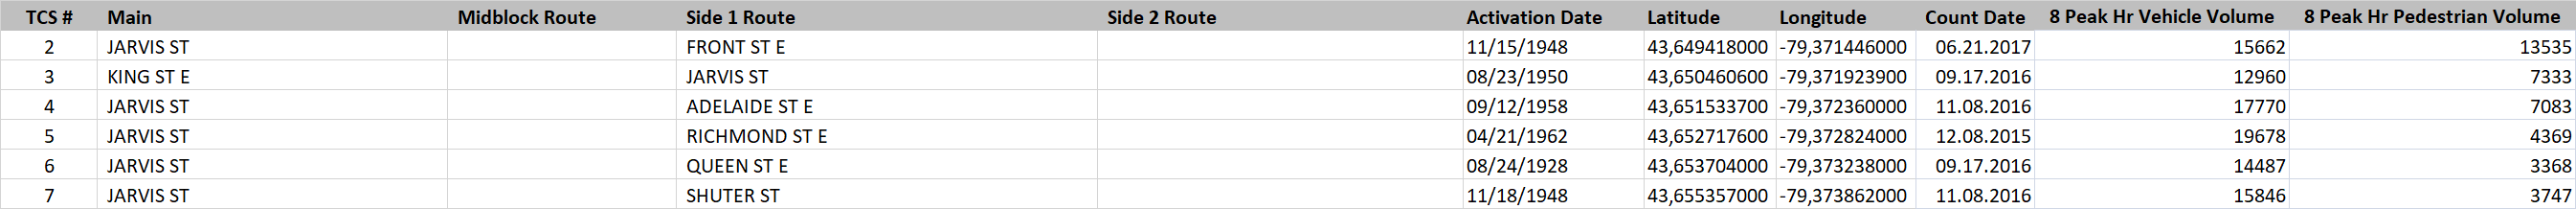

Again, source information can be found in the [references section](#references), it's an Excel file that can be downloaded. As the above sample shows, the table even contains geographical coordinates in the columns **Latitude** and **Longitude**, apart from the sought after pedestrian traffic data in the column **8 Peak Hr Pedestrian Volume**. The other columns are not of relevance for this project. The table is fairly up to date, the data was collected between 2011 and 2019.

### Geographical coordinates

In cases where geographical coordinates are not included with the data, as is the case for the table with the neighborhood names, I obtain these by accessing the Microsoft Bing Maps API. I pass an according search term to the API, here the city and neighborhood name, e.g. **Toronto, ON , Harbourfront**, to get the coordinates returned:

    Toronto, ON, Canada, (43.639190673828125, -79.38420104980469, 0.0)

Again, the next section contains more information on how these calls are done.

<a name="methodology"><h2>3. Methodology</h2></a>

This section describes the methods used in the project in acquiring, pre-processing and analyzing the data to find the most interesting neighborhoods for my customer’s chain of unboxed food stores.

It contains both the code and the description of the preparatory and analytical steps. Those that are interested in the functioning of the code will find explanatory comments in the code cells. We will be using Python as the coding language because of its versatility and support of many data-analytical functions through speialized libraries. Those not interested in coding can simply focus on the explanations in between those cells.

We will begin with loading some typical Python code libraries for data acquisition, processing, analytics and results presentation.

In [3]:
# Fundamental package for scientific computing
import numpy as np

# Library for data analsysis
import pandas as pd 
# sets how many columns and rows are displayed
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

# Library for parsing HTML pages
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup 

# Library for handling JSON files
import json 

# Convert an address into latitude and longitude values and import the Bing geocoder
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Bing 

# Library to handle web requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules, common plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# Import k-means clustering, a machine learning method and according metrics
from sklearn.cluster import KMeans
from sklearn import metrics

# Required for determining distances between cluster centers
from scipy.spatial.distance import cdist

# A versatile map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



<a name="methodology1"><h3>3.1 Collecting and preprocessing Toronto Neighborhood Data</h3></a>

In this sub-section we will scrape the neighborhood names from the Wikipedia Toronto postal codes data table introduced in the previous section and add the geographical coordinates. The result will be a Pandas data frame containing this information. Pandas data frames will be used throughout these projects. They are data tables used by Python and idealy suited for data science tasks.

We begin with loading the page from the web and assigning to a Beatiful Soup object for parsing and extracting the table with the postal codes and neighborhoods into a data frame.

In [13]:
# Had to load an older version because somebody
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

# Isolate the first table
table = soup.find_all('table')[0]

# ... and count the rows for processing
n_columns = 0
n_rows=0
column_names = []
    
# Determine number of rows and columns
for row in table.find_all('tr'):
                
    # Determine the number of rows in the table
    td_tags = row.find_all('td')
    if len(td_tags) > 0:
        n_rows+=1
    # Set the number of columns for table
    n_columns = len(td_tags)
                        
    #Get column names from the table header
    th_tags = row.find_all('th') 
    if len(th_tags) > 0:
        for th in th_tags:
            column_names.append(th.get_text().replace('\n','')) # Get column names and strip the line breaks '\n'
            
# Set up the data frame 
df = pd.DataFrame(columns = column_names,
                    index= range(0,n_rows))

# Get content cell by call and fill data frame
row_marker = 0
for row in table.find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    for column in columns:
        df.iat[row_marker,column_marker] = column.get_text().replace('\n','') # Get cell content and strip the line breaks '\n'
        column_marker += 1
    if len(columns) > 0:
        row_marker += 1

Let's check success by looking at the first 10 rows of the data frame:

In [14]:
df.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


As we can see, the data frame displays a few peculiarities. On the one hand it has postal codes where neither a borough nor a neighborhood is assigned and then there are rows where several neighborhoods are assigned to one postal code. There may also be duplicate neighborhood names stemming from a neighborhood being assigned to two postal codes. This means, we have a little cleaning to do before we can use the neighborhood names further. So in the next code blocks let’s do that and the extract the neighborhood names as a list.

In [15]:
# Copy only rows with boroughs that don't equal 'Not assigned' to a second data frame
df2 = df[df.Borough != 'Not assigned']
df2.reset_index(drop = True, inplace = True) # reset row numbering

# Is 'Not assigned' anywhere else in df2? 'False' means no 
'Not assigned' in df2.values

False

In [16]:
# Extract neighborhoods data into a new object
neighborhoods = df2['Neighbourhood']

# Iterate over the resulting object to split into single neigborhoods and re-assemble to a new one
neighborhoods2 = []
for m in range(neighborhoods.shape[0]):
    temp = neighborhoods[m].split(',') # ues the commas as a separator
    neighborhoods2 = neighborhoods2 + temp
   
# Extract data into a Pandas Series for easy whitespace removal
neighborhoods3 = pd.Series(neighborhoods2, name = 'Neighborhood')
neighborhoods4 = neighborhoods3.str.lstrip() # strip whitespace and copy to another series

# Remove duplicates, if any 
neighborhoods4.drop_duplicates(keep = 'first', inplace = True)

# Print first ten neighborhoods
neighborhoods4[0:10]

0                        Parkwoods
1                 Victoria Village
2                      Regent Park
3                     Harbourfront
4                   Lawrence Manor
5                 Lawrence Heights
6                     Queen's Park
7    Ontario Provincial Government
8                 Islington Avenue
9            Humber Valley Village
Name: Neighborhood, dtype: object

This looks good. The next task is to create a new data frame with the neighborhoods and to add the geographical coordinates. These we get from Microsoft Bing Maps via their API, as described in the previous section.

In [17]:
# Create a new data frame with neighborhoods and add columns for geographical coordinates
neighborhoods_coordinates = pd.DataFrame(neighborhoods4)
neighborhoods_coordinates.assign(Latitude = 0.0, Longitude = 0.0) # Initialize as float 0.0
neighborhoods_coordinates.reset_index(drop = True, inplace = True) # Need to assure that the index runs from 0 to no. rows-1

# Iterate over the new data frame and add the geographical coordinates from Bing Maps in the according columns
for m in range(neighborhoods_coordinates.shape[0]):
    address = 'Toronto, Ontario ' + neighborhoods_coordinates.loc[m, 'Neighborhood'] # Create addresss search string with neighborhood
    geolocator = Bing(api_key='')
    location = geolocator.geocode(address)
    neighborhoods_coordinates.loc[m,'Latitude'] = location.latitude # Replace 0.0 with the actual value
    neighborhoods_coordinates.loc[m,'Longitude'] = location.longitude

Let's check success and print a data frame sample:

In [18]:
neighborhoods_coordinates.head(10)

,Neighborhood,Latitude,Longitude
0,Parkwoods,43.755997,-79.329544
1,Victoria Village,43.728336,-79.314789
2,Regent Park,43.660652,-79.360489
3,Harbourfront,43.639191,-79.384201
4,Lawrence Manor,43.725235,-79.439537
5,Lawrence Heights,43.721920,-79.450676
6,Queen's Park,43.663425,-79.391914
7,Ontario Provincial Government,43.651894,-79.381714
8,Islington Avenue,43.639015,-79.547791
9,Humber Valley Village,43.670109,-79.521339


As we can see, some of the neighborhoods obviously return the same coordinates, e.g. **Queen's Park** and **Rouge**, obviously they are very close to each other. In any case, these would be duplicates in the search for venues in the next section and wouldn't add any information. We will therefore remove all except the first occurence from the data frame.

In [19]:
# Drop duplicates and reset data frame index
neighborhoods_coordinates.drop_duplicates(subset = ['Latitude', 'Longitude'], keep = 'first', inplace = True)
neighborhoods_coordinates.reset_index(drop = True, inplace = True)
print('This data frame contains the names and geographical coordinates of {} Toronto neighborhoods.'.format(neighborhoods_coordinates.shape[0]))
neighborhoods_coordinates.head(15)

This data frame contains the names and geographical coordinates of 147 Toronto neighborhoods.


,Neighborhood,Latitude,Longitude
0,Parkwoods,43.755997,-79.329544
1,Victoria Village,43.728336,-79.314789
2,Regent Park,43.660652,-79.360489
3,Harbourfront,43.639191,-79.384201
4,Lawrence Manor,43.725235,-79.439537
5,Lawrence Heights,43.721920,-79.450676
6,Queen's Park,43.663425,-79.391914
7,Ontario Provincial Government,43.651894,-79.381714
8,Islington Avenue,43.639015,-79.547791
9,Humber Valley Village,43.670109,-79.521339


Success, e.g. **Rouge** has been removed from the data frame. This concludes the work in this sub-section. We have a data frame containing the names and geographical coordinates of 147 Toronto neighborhoods in the columns **Neighborhood**, **Latitude** and **Logitude**. This is what we need as a basis for the next step.

<a name="methodology2"><h3>3.2 Adding Information on Good Neighbors and Competitors to the Neighborhood Data</h3></a>

As a first step we need to exactly define what types of venues we are looking for. For this purpose, I have accessed Foursquare’s developer support page to see what categories are in their venue database and to see how they match the detail information I have been given by the customer. The link can be found in the [references section](#references). I have collected the information in two data frames for later use: 

In [20]:
# Data frame with good neighbors
fr = {'Category': ['College Academic Building', 'University', 'High School', 'Library', 'Thrift / Vintage Store', 'Used Bookstore'], 'CategoryId': ['4bf58dd8d48988d198941735', '4bf58dd8d48988d1ae941735', '4bf58dd8d48988d1a3941735','4bf58dd8d48988d12f941735', '4bf58dd8d48988d101951735', '52f2ab2ebcbc57f1066b8b30']}
friends = pd.DataFrame(data=fr)

# Data frame with competitors
fo = {'Category': ['Cheese Shop', 'Farmers Market', 'Grocery Store', 'Health Food Store', 'Organic Grocery', 'Supermarket', 'Market','Fruit & Vegetable Store'], 'CategoryId': ['4bf58dd8d48988d11e951735', '4bf58dd8d48988d1fa941735', '4bf58dd8d48988d118951735', '50aa9e744b90af0d42d5de0e', '52f2ab2ebcbc57f1066b8b45', '52f2ab2ebcbc57f1066b8b46', '50be8ee891d4fa8dcc7199a7','52f2ab2ebcbc57f1066b8b1c']}
foes = pd.DataFrame(data=fo)


Here is the **friends** data frame in a bit more readable version:

In [21]:
friends

,Category,CategoryId
0,College Academic Building,4bf58dd8d48988d198941735
1,University,4bf58dd8d48988d1ae941735
2,High School,4bf58dd8d48988d1a3941735
3,Library,4bf58dd8d48988d12f941735
4,Thrift / Vintage Store,4bf58dd8d48988d101951735
5,Used Bookstore,52f2ab2ebcbc57f1066b8b30


 Here is the **foes** data frame.

In [22]:
foes

,Category,CategoryId
0,Cheese Shop,4bf58dd8d48988d11e951735
1,Farmers Market,4bf58dd8d48988d1fa941735
2,Grocery Store,4bf58dd8d48988d118951735
3,Health Food Store,50aa9e744b90af0d42d5de0e
4,Organic Grocery,52f2ab2ebcbc57f1066b8b45
5,Supermarket,52f2ab2ebcbc57f1066b8b46
6,Market,50be8ee891d4fa8dcc7199a7
7,Fruit & Vegetable Store,52f2ab2ebcbc57f1066b8b1c


At this early stage it is sufficient to count the venues that fall into the good neighbor (**Friends**) and the competitor category (**Foes**). We will do that by accessing Foursqaure and adding the counts to the neighborhood data. We begin by creating a new data frame **neighborhoods_friends_foes** from **neighborhoods_coordinates** by inserting two new columns called **Friends** and **Foes**. 

The advantage of the Foursquare API is that we can pass multiple **CategoryId**s simultaneously separated by commas. This allows us to do only one **friends** and one **foes** search each for a neighborhood and just count the returned search results. 

In [23]:
# Create new data frame with neighborhoods + friends & foes
neighborhoods_friends_foes = neighborhoods_coordinates.assign(Friends = 0, Foes = 0) # Initialize as integer

# Add Foursquare credentials and initialize som variables
CLIENT_ID = '' #  Foursquare ID
CLIENT_SECRET = '' #  Foursquare Secret
ACCESS_TOKEN = '' # FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500 # Search radius in m around the coordinates passed to Foursquare

# Build the category search for friends from the friends data frame
CategoryId =''
for m in range(friends.shape[0]) :
    temp = friends.loc[m,'CategoryId']
    CategoryId = CategoryId + temp
    if m < (friends.shape[0] - 1) :
        CategoryId = CategoryId + ',' # Add commas between the IDs taken from friends
        
# Iterate over the whole data frame and get the number of friends
for n in range(neighborhoods_friends_foes.shape[0]) :
    latitude = neighborhoods_friends_foes.loc[n,'Latitude']
    longitude = neighborhoods_friends_foes.loc[n, 'Longitude']
    
    # Create the URL for the search related to the specific neighborhood
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, CategoryId, radius, LIMIT)
    results = requests.get(url).json()["response"]['venues'] # This strips the leading part of the list and simply allows to count elements
    neighborhoods_friends_foes.loc[n, 'Friends'] = len(results) # Count and add to the data frame

# Build the category search for foes from the foes data frame
CategoryId =''
for m in range(foes.shape[0]) :
    temp = foes.loc[m,'CategoryId']
    CategoryId = CategoryId + temp
    if m < (foes.shape[0] - 1) :
        CategoryId = CategoryId + ',' # Add commas between the IDs taken from foes
    
# Iterate over the whole data frame and get the number of friends
for n in range(neighborhoods_friends_foes.shape[0]) :
    latitude = neighborhoods_friends_foes.loc[n,'Latitude']
    longitude = neighborhoods_friends_foes.loc[n, 'Longitude']
    
    # Create the URL for the search related to the specific neighborhood
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, CategoryId, radius, LIMIT)
    results = requests.get(url).json()["response"]['venues'] # This strips the leading part of the list and simply allows to count elements
    neighborhoods_friends_foes.loc[n, 'Foes'] = len(results) # Count and add to the data frame

Once again, let's check if everything has worked:

In [24]:
neighborhoods_friends_foes.head(10)

,Neighborhood,Latitude,Longitude,Friends,Foes
0,Parkwoods,43.755997,-79.329544,1,0
1,Victoria Village,43.728336,-79.314789,1,1
2,Regent Park,43.660652,-79.360489,5,7
3,Harbourfront,43.639191,-79.384201,1,6
4,Lawrence Manor,43.725235,-79.439537,0,0
5,Lawrence Heights,43.721920,-79.450676,1,0
6,Queen's Park,43.663425,-79.391914,47,11
7,Ontario Provincial Government,43.651894,-79.381714,26,21
8,Islington Avenue,43.639015,-79.547791,0,0
9,Humber Valley Village,43.670109,-79.521339,0,0


This looks great, we can definitely see differences between the neighborhoods. Let's now add the pedestrian count information.

<a name="methodology3"><h3>3.3 Adding Pedestrian Traffic Information to the Neighborhood Data</h3></a>

We begin with loading the Excel file from the location I have listed in the [reference section](#references), assigning it to a data frame and display the first few rows. 

In [25]:
# Read Excel file from web source and use pandas method to convert it into a data frame 
!wget -q -O 'traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx' https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ae4e10a2-9eaf-4da4-83fb-f3731a30c124/resource/ea4d9b68-f645-4878-bd1d-d7273450255c/download/traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx
traffic_data = pd.read_excel('traffic-signal-vehicle-and-pedestrian-volumes-data.xlsx')
traffic_data.head()

,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,2017-06-21,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,2016-09-17,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,2016-11-08,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,2015-12-08,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,2016-09-17,14487,3368


This looks good, although the data frame contains a lot of information that we don't need. For the purpose of this investigation we only need the columns **Latitude**, **Longitude**, and **8 Peak Hr Pedestrian Volume**. To get rid of what we don't need we will simply copy those to a new data frame and then investigate what  we have a little closer: 

In [26]:
# Copy required data to new data frame
pedestrian_traffic = traffic_data[['Latitude', 'Longitude', '8 Peak Hr Pedestrian Volume']]
pedestrian_traffic.describe()

,Latitude,Longitude,8 Peak Hr Pedestrian Volume
count,2280.000000,2280.000000,2280.000000
mean,43.713472,-79.394597,1990.127193
std,0.056042,0.164106,3984.960526
min,43.591686,-79.639290,0.000000
25%,43.664934,-79.475263,280.000000
50%,43.709355,-79.396512,712.000000
75%,43.760777,-79.317662,1700.250000
max,43.855450,-73.389642,47561.000000


Actually, only the **8 Peak Hr Pedestrian Volume** column is of importance. It shows that the 75th percentile is at roughly 1,700 pedestrians, whereas the maximum is at over 47,500. We can conclude from this that we will only have fairly small number of cases where the pedestrian traffic is very high and this is promising, because it means that we will be able to limit the number of interesting locations from this perspective and not simply everything is good.

Now let's take a step back and consider what conclusions we can draw from the data in the **8 Peak Hr Pedestrian Volume** column: First of all the counts were done on single, different working days some time between 2011 and 2019 and secondly, even if everything was counted on the same day, we would definitely count a large number of pedestrians twice or several times as they walk through the city and pass several signaled pedestrian crossings. What that means is that we shouldn't take the figures literally but just as an indicator whether it's a busy spot or not. We can therefore sort the crossing into categories according how frequented they are. I have tried around a little and have come up with five categories from 0 (not busy) to 4 (very busy) that I have assigned as shown below.

In [33]:
# Add a new column 'Busy' to the data frame and add categories  
pedestrian_traffic.assign(Busy = 0)
maximum = pedestrian_traffic.max(0, 2)[2] # Extract the maximum value from the '8 Peak Hr Pedestrian Volume' column
divisor = maximum / 5 # For creating categories

# Calculate and add the categroy values to the 'Busy' column
for m in range(pedestrian_traffic.shape[0]) :
     temp = round(pedestrian_traffic.loc[m, '8 Peak Hr Pedestrian Volume'] / divisor)
     if temp < 5.0 : # sorts rounded values into categories 0 to 4
                pedestrian_traffic.loc[m, 'Busy'] = temp
     elif temp == 5.0: # assigns values rounded to 5 to category 4 as well
                pedestrian_traffic.loc[m, 'Busy'] = 4

pedestrian_traffic.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Latitude,Longitude,8 Peak Hr Pedestrian Volume,Busy
0,43.649418,-79.371446,13535,1.0
1,43.650461,-79.371924,7333,1.0
2,43.651534,-79.372360,7083,1.0
3,43.652718,-79.372824,4369,0.0
4,43.653704,-79.373238,3368,0.0
5,43.655357,-79.373862,3747,0.0
6,43.657052,-79.374531,5858,1.0
7,43.660432,-79.375854,6493,1.0
8,43.662420,-79.376708,6165,1.0
9,43.666289,-79.378325,5213,1.0


This looks as if it has worked. (Note: if a warning is shown after the code cell above, ignore. This is a freak occurrence I was not able to get rid of.) Let's have a look at the distribution over the classes. 

In [35]:
pedestrian_traffic.value_counts(['Busy'])

Busy
0.0     2050
1.0      176
2.0       35
3.0       17
4.0        2
dtype: int64

This is as expected from looking at the summary statsistics above, almost 90 % of the data fall into category 0 - not busy, leaving only 230 in the more interesting categories, and a mere 19 are in the highest two. As I have used the Python **round()** function to categorize the data and also have merged the top two categories let's look at a graphic representation of what I have been doing for better understanding:

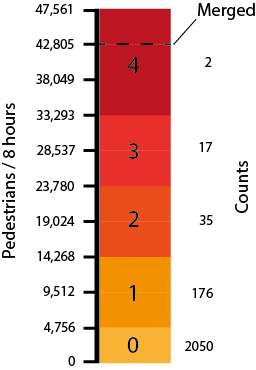

The graph shows how the rounding of the division in the code cell above creates the categories. **0** is the smallest, containing between 0 and 4,756 pedestrians per 8 hours but still has the most counts with 2,050. Category **4** is the largest, but only because it was merged with category **5** (see the conditions in the code cell above).

As a next step let's see how many of the categorized crossings fall into the 500 m radius. For that we will create another column **Pedestrians** on our **neighborhoods_friends_foes** data frame. As an indicator of how busy the area is we will add the sum of the category numbers of these crossings. This means the larger the number for a neighborhood is the busier the area will be with pedestrian traffic.

A note on the calculation of the distances between neighborhood and crossings: As the positions are given in degrees latitude and longitude but we are looking for a distance in meters, we need to do some unit conversions and other calculations. The second link in the [references sub-section](#references) for this section points to an informative article on how this is done best, for those interested.

In [36]:
r = 500 # Value for radius
c_factor = 111139 # Conversion factor from degrees to m

# Add a new column Pedestrians to eighborhoods_friends_foes
neighborhoods_friends_foes.assign(Pedestrians = 0)

# Iterate over the whole eighborhoods_friends_foes data frame to assign a value for Pedestrians
for m in range(neighborhoods_friends_foes.shape[0]) :
    tmp = 0
    
    # Iterate over the pedestrian_traffic data frame to determine the distance of each crossing to the location
    # of the current neighborhood
    for n in range(pedestrian_traffic.shape[0]) :
        # Calculate the difference between the latitude and longitude of neighborhood and current crossing 
        # and convert to m
        x = (abs(neighborhoods_friends_foes.loc[m, 'Latitude'] - pedestrian_traffic.loc[n, 'Latitude'])) * c_factor
        y = (abs(neighborhoods_friends_foes.loc[m, 'Longitude'] - pedestrian_traffic.loc[n, 'Longitude'])) * c_factor
        dist = np.sqrt(np.square(x) + np.square(y)) # Use Pythagorean theorem to calculate actual distance
        if dist <= r : # If the distance falls within the radius add crossing's category to tmp
            tmp = tmp + pedestrian_traffic.loc[n, 'Busy']
    # Add sum of all crossing categories to the current neighborhood's Pedestrian cell
    neighborhoods_friends_foes.loc[m, 'Pedestrians'] = tmp 

Let's look at the first to rows of the data frame.

In [37]:
neighborhoods_friends_foes.head(10)

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
0,Parkwoods,43.755997,-79.329544,1,0,0.0
1,Victoria Village,43.728336,-79.314789,1,1,0.0
2,Regent Park,43.660652,-79.360489,5,7,0.0
3,Harbourfront,43.639191,-79.384201,1,6,1.0
4,Lawrence Manor,43.725235,-79.439537,0,0,0.0
5,Lawrence Heights,43.721920,-79.450676,1,0,0.0
6,Queen's Park,43.663425,-79.391914,47,11,4.0
7,Ontario Provincial Government,43.651894,-79.381714,26,21,35.0
8,Islington Avenue,43.639015,-79.547791,0,0,0.0
9,Humber Valley Village,43.670109,-79.521339,0,0,0.0


Already in the first 10 rows we have a wide variety of values within the **Pedestrians** column, ranging from **0** (not much happening) to **35** (extremely busy).

As we now have variables for all three aspects we are looking at,
1. Pedestrian traffic during opening hours within a radius of 500 m around the neighborhood geographical coordinates is in the column **Pedestrians**,
2. Number of other venues preferred by the target group, within the same radius, is in the column **Friends**,
3. Number of competitors, again within the same radius, is in the column **Foes**,

we can conclude our preparatory work with a final look at the statsitical summary of our **neighborhoods_friends_foes** data frame.

In [38]:
neighborhoods_friends_foes.describe()

,Latitude,Longitude,Friends,Foes,Pedestrians
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,43.701112,-79.403962,4.836735,4.598639,2.387755
std,0.073795,0.140986,10.877299,8.159925,7.392563
min,43.503719,-79.749565,0.000000,0.000000,0.000000
25%,43.652805,-79.490730,0.000000,0.000000,0.000000
50%,43.689465,-79.397628,1.000000,1.000000,0.000000
75%,43.740686,-79.349670,2.500000,5.000000,0.000000
max,44.294315,-78.318047,50.000000,43.000000,43.000000


Comparing the values at the 75th percentile and the maxima, it shows that we have the highest variability in this region, which seems very promising, at least for **Friends** and **Pedestrians**, the **Foes** - of course - we want to have minimized.

<a name="methodology4"><h3>3.4 Analysis of Data Using Machine Learning</h3></a>

The next step and final step in the analysis of the data ist to perform machine learning-based clustering, so-called k-means clustering which is especially suitable for this type of data. It is an unsupervised method that clusters data around a pre-selected number of center points and minimzes variances within clusters using squared Euclidiean distances, meaning it requires no training to find a local optimum. So much for the tech-talk.

Clustering can be understood as grouping data with similar properties. This is what we need to determine the most suitable neighborhoods based on the chosen parameters, meaning find the right cluster containing only those. The performance of k-means clustering is usually optimized by varying the number of clusters used and by normalizing the data if the ranges are very different. The latter is not necesary here because all of the variables run roughly betwen 0 and 50.

We will therefore only vary the number of clusters between 1 and 9 and plot two quality parameters **distortion** and **inertia** and use the elbow method to determine the optimal number. The optimum is reached when the slope in the accoring graphs (see below) changes sharply and the value decreases linearly with increasing number of clusters. Distortion is calculated as the average of the squared distances (typically Euclidian) from the center of a cluster. Inertia is the sum of squared distances of samples to their closest cluster center.

In [39]:
# Set up and perform determination of ideal number of clusters via inertia and distortion
distortion_values = []
inertia_values = []
kclusters = range(1, 10)

# Isolate the three variables / columns for clustering
nff_clustering = neighborhoods_friends_foes[['Friends', 'Foes', 'Pedestrians']]

# Perform k-means clustering on nff_clustering and iterate k values 1 to 9
for k in kclusters:
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 12).fit(nff_clustering)
    
    distortion_values.append(sum(np.min(cdist(nff_clustering, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / nff_clustering.shape[0]) # Calculate the distortion using the sum of minimal Euclidian distances between cluster centers
    inertia_values.append(kmeans.inertia_) # Inertia is included in the metrics package, we can simply use it

Here is the plot of The distortions calculated for the different number of clusters:

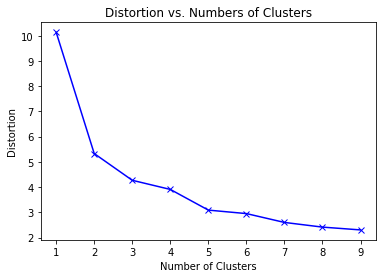

In [40]:
# Create a line plot with x as markers and blue line
plt.plot(kclusters, distortion_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Distortion vs. Numbers of Clusters')
plt.show()

It is a bit difficult to judge, but I would say that the linear part starts at cluster 7. Let's look at inertia next.

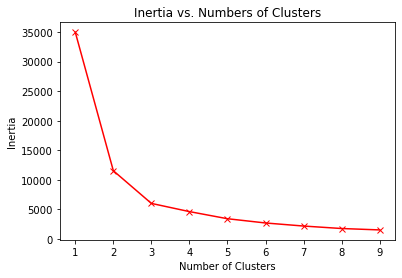

In [41]:
# Create a line plot with x as markers and red line
plt.plot(kclusters, inertia_values, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Numbers of Clusters')
plt.show()

The situation here is much clearer, the optimum is 3 clusters. Considering both, I choose 7 clusters. Next. let's repeat the clustering with k = 7 and use the results for our task of determining the optimal neighborhoods. We will add the number of the cluster number (label) in a separate column in first position of our **neighborhoods_friends_foes** data frame. 

In [42]:
# Cluster again for results generation, 7 
k = 7
kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 12).fit(nff_clustering)

# Add cluster labels to the neighbourhoods_venues_sorted data frame
neighborhoods_friends_foes.insert(0, 'Cluster', kmeans.labels_)

Finally, a quick look at some results:

In [43]:
neighborhoods_friends_foes.head()

,Cluster,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
0,6,Parkwoods,43.755997,-79.329544,1,0,0.0
1,6,Victoria Village,43.728336,-79.314789,1,1,0.0
2,0,Regent Park,43.660652,-79.360489,5,7,0.0
3,0,Harbourfront,43.639191,-79.384201,1,6,1.0
4,6,Lawrence Manor,43.725235,-79.439537,0,0,0.0


This seems as if clustering has worked, time to review the results.

<a name="results"><h2>4. Results</h2></a>

Below is the wole data frame with all 147 rows, separated into the clusters, output by cluster number.

### Cluster 0

In [44]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 0, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
2,Regent Park,43.660652,-79.360489,5,7,0.0
3,Harbourfront,43.639191,-79.384201,1,6,1.0
20,St. James Town,43.669231,-79.372810,6,12,0.0
28,The Beaches,43.671120,-79.299294,2,5,0.0
33,Christie,43.664124,-79.418381,7,13,2.0
39,Dufferin,43.660034,-79.435623,7,9,1.0
45,Broadview North (Old East York),43.688560,-79.355278,4,3,0.0
48,Little Portugal,43.647766,-79.429115,6,10,1.0
49,Kennedy Park,43.652344,-79.473373,2,8,1.0
52,The Danforth West,43.686943,-79.306389,5,6,0.0


### Cluster 1

In [45]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 1, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
7,Ontario Provincial Government,43.651894,-79.381714,26,21,35.0
46,Union Station,43.645199,-79.380600,12,20,29.0
54,Toronto Dominion Centre,43.645302,-79.380699,12,20,28.0
55,Design Exchange,43.648155,-79.380486,13,24,43.0
118,Railway Lands,43.644661,-79.380768,12,17,26.0


### Cluster 2

In [46]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 2, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
6,Queen's Park,43.663425,-79.391914,47,11,4.0
13,Garden District,43.658234,-79.377853,46,18,20.0
44,York University,43.773705,-79.503281,50,2,1.0
94,Yorkville,43.672859,-79.388542,33,14,8.0
101,University of Toronto,43.664276,-79.397575,47,8,7.0
109,Grange Park,43.652435,-79.392258,39,18,14.0
144,South of Bloor,43.667978,-79.397628,49,8,9.0


### Cluster 3

In [47]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 3, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
107,Kensington Market,43.655235,-79.402290,37,38,2.0
108,Chinatown,43.653084,-79.397247,42,41,9.0
133,First Canadian Place,43.653904,-79.368125,27,26,4.0


### Cluster 4

In [48]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 4, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
29,Berczy Park,43.647999,-79.375282,19,43,23.0
38,King,43.649475,-79.377548,14,42,39.0


### Cluster 5

In [49]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 5, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
32,Central Bay Street,43.644371,-79.378437,6,16,16.0
117,CN Tower,43.642899,-79.387154,6,10,9.0
136,Church and Wellesley,43.665714,-79.380936,14,18,11.0


### Cluster 6

In [50]:
neighborhoods_friends_foes[['Neighborhood', 'Latitude', 'Longitude', 'Friends', 'Foes', 'Pedestrians']].loc[neighborhoods_friends_foes['Cluster'] == 6, ] 

,Neighborhood,Latitude,Longitude,Friends,Foes,Pedestrians
0,Parkwoods,43.755997,-79.329544,1,0,0.0
1,Victoria Village,43.728336,-79.314789,1,1,0.0
4,Lawrence Manor,43.725235,-79.439537,0,0,0.0
5,Lawrence Heights,43.721920,-79.450676,1,0,0.0
8,Islington Avenue,43.639015,-79.547791,0,0,0.0
9,Humber Valley Village,43.670109,-79.521339,0,0,0.0
10,Malvern,43.802200,-79.223869,0,1,0.0
11,Don Mills,43.738026,-79.349487,2,0,0.0
12,Woodbine Gardens,43.702412,-79.301491,1,1,0.0
14,West Deane Park,43.665852,-79.566513,0,0,0.0


Without going to deep into the discussion at this point, we can already see that clusters 0 and 6 contain those results that are not of interest, the vast majority contains 0 in the **Pedestrians** column and not very high figures in **Friends** and **Foes**. We will therefore exclude them from the further analysis.

In preparation for the discusion, let's display the clusters on a map of Toronto:

In [51]:
# Get the coordinates of Davisville first to center the map around
address = 'Toronto, Ontario, Davisville'
geolocator = Bing(api_key='')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Create a new map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 12, control_scale = True)

# Set the color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add the cluster markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_friends_foes['Latitude'], neighborhoods_friends_foes['Longitude'], neighborhoods_friends_foes['Neighborhood'], neighborhoods_friends_foes['Cluster']):
    if cluster != 0 and cluster != 6 : # Exclude clusters 0 and 4
        label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html  =True)
        folium.CircleMarker(
            [lat, lon],
            radius = 5,
            popup = label,
            color = rainbow[cluster - 2],
            fill = True,
            fill_color = rainbow[cluster - 2],
            fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

As we can see most of the neighborhoods of potential interest are close to each other in downtown Toronto, so let's produce a second map with a higher zoom factor to show some more detail here.

In [52]:
# Get the coordinates of the Provincial Government to center the map around
address = 'Toronto, Ontario Provincial Government'
geolocator = Bing(api_key='')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# Create a new map
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 14, control_scale = True)

# Set the color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add the cluster markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_friends_foes['Latitude'], neighborhoods_friends_foes['Longitude'], neighborhoods_friends_foes['Neighborhood'], neighborhoods_friends_foes['Cluster']):
    if cluster != 0 and cluster != 6 : # Exclude clusters 0 and 4
        label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html = True)
        folium.CircleMarker(
            [lat, lon],
            radius = 5,
            popup = label,
            color = rainbow[cluster - 2],
            fill = True,
            fill_color = rainbow[cluster - 2],
            fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

<a name="discussion"><h2>5. Discussion</h2></a>

Now that we have visually inspected the results of our data analyis in the previous section, it is time to assess what we have found in more detail and relate it to our original task of finding suitable spots for unboxed food stores for a German chain.

We begin by discussing the clusters. As data varies quite a bit within the clusters, I have calculated the median (center) value for the three parameters we are looking for in every cluster which will allow us to characterize them better.

In [53]:
neighborhoods_friends_foes.groupby('Cluster').median()[['Pedestrians', 'Friends', 'Foes']]

,Pedestrians,Friends,Foes
Cluster,,,
0,0.0,3.5,6.0
1,29.0,12.0,20.0
2,8.0,47.0,11.0
3,4.0,37.0,38.0
4,31.0,16.5,42.5
5,11.0,6.0,16.0
6,0.0,0.0,0.0


As mentioned in the introduction the most important parameter is the pedestrian traffic in the area, the higher the better. Second-most important is the number of friends in the vicinity, those are other venues that are frequented by the same target group as the unboxed stores. The assumption is that they will likely also pay attention to -  and vist - an unboxed store if they are already in the vicinity. Also of importance, in 3rd place, are the foes the competitors of all kinds. More information on these categories can be found in [section 3.2](#methodology2).

Using this knowledge in interpreting the data in the table above, first of all confirms the finding that we can ignore clusters 0 and 6. They contain those neighborhoods that are of no interest according to this work, cluster 6 contains a median of 0 in all columns, cluster 0 looks slightly better but still the pedestrians value is at 0.

Cluster 4 is obviously the winner with the highest value in the **Pedestrians** column, it has a reasonable value in the **Friends** column and unfortunately a very high value in the **Foes** column. A close follower is cluster 5 which has even a better value for friends and foes. It seems that where there is much pedestrian traffic competition is already there. In third place we find cluster 5. We have somewhat less pedestrian traffic and also fewer friends but over-proportionally more foes again. Fourth is cluster two. Here we have a fairly moderate pedestrian traffic but a very high number of friendly venues and few competitors in comparison. Finally, we have cluster 3 in 5th place, not very high pedestrian traffic but very high - and almost equal - numbers of friends and foes. Let’s discuss the individual clusters in a bit more detail.

### Most Attractive - Cluster 4

The members of this cluster are recognizable by the light-blue markers in the maps. As we can see the cluster only has two members, Berczy Park and King, latter is very high in pedestrian traffic, but also quite extreme in the number of foes. 

### Attractive - Cluster 1

The members of this cluster are recognizable by the red markers in the maps. The cluster has five members, three of them are so close together that we actually have to count them as one. These are Union Station, Dominion Centre, and Railway Lands. The other two members Ontario Provincial Government and Design Exchange also have an overlap but are more distant from each other. The most attractive from a pedestrian traffic point of view is Design Exchange, followed by Ontario Provincial Government.

### Somewhat Attractive - Cluster 5 

This cluster has three members that can be found in the maps by their light-green markers, CN Tower, Central Bay Street, and Church and Wellesley. They are fairly spread out over downtown Toronto. Central Bay Street has the highest pedestrian traffic, the other two are lower. In all three cases there are a few more foes than friends.

If we look at the number of neighborhoods in those 3 clusters we are way below the threshold of 20 given to us, no matter if we count the above mentioned three close-by neighborhoods in cluster 1 as one or not. We will therefore also have to consider the remaining two clusters.

### Fourth Place - Cluster 2

The purple markers denote the 7 members which are spread over downtown Toronto, with the exception of York University that is the most distant. The common denominator is that they have very high numbers in the **Friends** column, at least double that in the **Foes** column, the reason for this is that they are close to universities and other institutions of higher education. Pedestrians vary quite a bit between  Garden District, which is very high with 20 and York University which is low with only 1. The other members are Grange Park, which is also attractive from a pedestrian traffic point of view, South of Bloom, Yorkville University of Toronto, and Queen’s Park, in the oder of descending pedestrian traffic.

### Fifth Place - Cluster 3 

This cluster has three members that can be recognized in the maps by their blue markers. They are spread East to West over downtown Toronto, a bit distant from the waterfront. The members of this cluster are characterized by very high and almost equal figures in the **Friends** and **Foes** columns, whereas the pedestrian traffic is moderate to fairly low.

All in all, we now have 20 neighborhoods that are worth closer investigation by my customer.

<a name="conclusion"><h2>6. Conclusion and Recommendations</h2></a>

The work on the task given for this project, to perform early-stage exploratory work in finding the most suitable neighborhoods for setting up 3 - 5 unboxed food stores, could be successfully completed. It allowed to exclude 190 out of 210 of the neighborhoods from the search for the perfect location. 63 could be taken from the list because Bing Maps returned geographical coordinates which were in duplicate with those of other neighborhoods in the list. The remaining 127 neighborhoods could be excluded by analyzing meaningful data obtained on venues that could be considered friendly or competitors, obtained from Foursquare, and pedestrian traffic information distilled from a spreadsheet of pedestrian and vehicle traffic counts at at signaled crossings in Toronto, published by the city council, with machine learning.

As demanded by the customer as a minimum figure, this leaves 20 neighborhoods, a little less than 10 % of the neighborhoods found in the postal code table on the Wikipedia page referenced below, for more in-depth analysis by the German unboxed store chain wishing to expand to Canada.

###  Recommendations

The next steps could be to look at other data, like property prices or rents and the availability of shop space in these neighborhoods. The final step, provided that the venture is still attractive to the store chain, could then be a physical visit to Toronto, then perhaps already to find partners, potential suppliers, and contractors for getting started with the customer's Canadian business.

<a name="references"><h2>7. References</h2></a>

I am collecting information on the sources I have used in the simple structure below.

### Section 1., Introduction

#### Sample page of a Toronto unboxed store
https://unboxedmarket.com/ (accessed 2021-03-02)

#### Information on the business model of an unboxed store
https://gruenderplattform.de/geschaeftsideen/unverpackt-laden-eroeffnen (accessed 2021-03-02) 
This is a web portal by the German ministry of commerce and the German government’s promotional bank KfW for startups and young entrepreneurs, page on opening an unboxed store, text in German.

### Section 2., Data Used for Solving the Problem 

#### List of Toronto postcodes by Wikipedia
https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M (accessed 2021-03-11)
This list also contains neighborhood information. Note: had to switch to an old version, because somebody edited the table layout: https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1011037969

#### Table with pedestrian traffic information by the Toronto city council
https://ckan0.cf.opendata.inter.prod-toronto.ca/en/dataset/traffic-signal-vehicle-and-pedestrian-volumes (accessed 2021-03-04)
Excel file and readme document with pedestrian and vehicle traffic volumes at signaled intersections in Toronto.

### Section 3., Methodology

#### Categories list on the Foursquare developers support site
https://developer.foursquare.com/docs/build-with-foursquare/categories/ (accessed 2021-03-06)

#### Article on how to calculate distances in meters from position data in degrees latitude and longitude
https://sciencing.com/convert-distances-degrees-meters-7858322.html (accessed 2021-03-07)

